# MNIST

[http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

## Reading bytes from files

In [2]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

In [3]:
type(file_content)

bytes

In [4]:
file_content[0:4]

b'\x00\x00\x08\x03'

## Little and big endian

In [7]:
# Adapted from: https://stackoverflow.com/questions/51220161/how-to-convert-from-bytes-to-int

int.from_bytes(file_content[0:4], byteorder='big')

2051

In [8]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [9]:
int.from_bytes(file_content[8:12], byteorder='big')

28

In [10]:
int.from_bytes(file_content[12:16], byteorder='big')

28

In [11]:
int.from_bytes(file_content[278:279], byteorder='big')

163

## Reading a single image

In [9]:
l = file_content[16:800]

In [10]:
type(l)

bytes

In [11]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

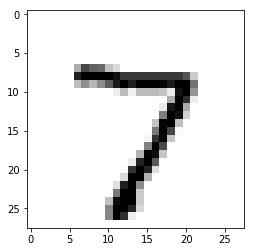

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

## Reading a label

In [13]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [14]:
int.from_bytes(labels[8:9], byteorder="big")

7

## Neural network

In [40]:
# Import keras.
import keras as kr

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [42]:
inputs = train_img.reshape(60000, 784)

In [43]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [44]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [46]:
model.fit(inputs, outputs, epochs=2, batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 14s 238us/step - loss: 0.2339 - acc: 0.9283
Epoch 2/2
60000/60000 [==============================] - 14s 230us/step - loss: 0.1796 - acc: 0.9448


In [21]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [22]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

8758

In [23]:
model.predict(test_img[5:6])

array([[2.5336881e-04, 9.3750048e-01, 1.0156847e-02, 1.7350907e-02,
        1.2244353e-03, 3.5175113e-03, 1.9321947e-03, 9.3115093e-03,
        1.6337547e-02, 2.4152596e-03]], dtype=float32)

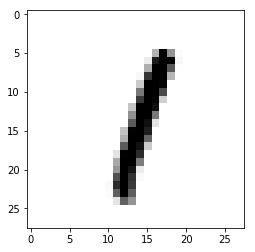

In [24]:
plt.imshow(test_img[5].reshape(28, 28), cmap='gray')

## End